In [200]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
%matplotlib inline

In [201]:
pd.set_option('display.max_colwidth', 600)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 600)
plt.rcParams["figure.figsize"] = (14,5)

In [202]:
engine = create_engine('postgresql://mlanciau@localhost:5432/mlanciau')
conn = engine.connect();

# Last 20 tweets about PostgreSQL

In [203]:
pd.read_sql('''
SELECT *
FROM mlanciau_gold.t_twitter_postgresql
ORDER BY c_id DESC
LIMIT 20
''', conn)

,c_id,c_text,c_lang,c_retweet,c_created_at,c_loaded_at,c_author_id
0,1524944985355096065,@70b1a5 @mim_djo Sounds like technically it is optimising the plumbing between postgres and colossus. If so not really generally applicable enough for oss. You were burned on a deprecation before?,en,False,2022-05-13 02:49:51+00:00,2022-05-13 02:50:02.534373+00:00,2245334732
1,1524941904734920704,"joking aside, unless Google start contributing back code to Postgres then it is just pure marketing talk .",en,False,2022-05-13 02:37:36+00:00,2022-05-13 02:45:02.113682+00:00,796152745203929089
2,1524941480053207042,Rustのtokio-postgresでストアードプロシージャのデバッグが楽になる方法\nhttps://t.co/SpgfFo4Q12,ja,False,2022-05-13 02:35:55+00:00,2022-05-13 02:45:02.113682+00:00,1246434357385891840
3,1524938751188803598,RT @FujitsuPostgres: Secure data anywhere with FUIJTSU Enterpise Postgres on IBM Power®. Read more in our blog at https://t.co/SQiR2GOaaX #…,en,True,2022-05-13 02:25:04+00:00,2022-05-13 02:45:02.113682+00:00,1348558873636921349
4,1524938728703025153,Secure data anywhere with FUIJTSU Enterpise Postgres on IBM Power®. Read more in our blog at https://t.co/SQiR2GOaaX #postgres #ibmpower #opensource #fujitsuenterprisepostgres https://t.co/8grdFakFCk,en,False,2022-05-13 02:24:59+00:00,2022-05-13 02:45:02.113682+00:00,821983480137420800
5,1524938215936954369,RT @mizchi: Cloudflare D1 のネーミングが D1 なの、次絶対 sqlite 制約を外した postgres 互換の D2 とか出してきて R2-D2 スタックです！ってやるつもりでしょ,ja,True,2022-05-13 02:22:57+00:00,2022-05-13 02:45:02.113682+00:00,1459543936670777354
6,1524934181112778752,😀 RebelWorks is hiring a remote Senior Golang Developer #RebelWorks #remotework #remotejob #workfromhome #MongoDB #PostgreSQL #Postgres #MariaDB #MySQL #Docker #AWS #SQL #Web https://t.co/7YYnQFu7jN,en,False,2022-05-13 02:06:55+00:00,2022-05-13 02:20:02.455119+00:00,1255452976673697797
7,1524932629069303808,blockchains are infrastructure so this is the way you don't see me crowing about how i build shit on postgres or whatever (i'm a postgres stan) https://t.co/czSa6YN8f0,en,False,2022-05-13 02:00:45+00:00,2022-05-13 02:20:02.455119+00:00,88974993
8,1524932194375856128,"RT @_GBartolini_: ""I applaud @EDBPostgres's effort to make the #data on #Kubernetes system more #open and give #Postgres users an easy onra…",en,True,2022-05-13 01:59:01+00:00,2022-05-13 02:20:02.455119+00:00,139776062
9,1524932089841328128,RT @PerconaBytes: Join the talk A Deep Dive Into #PostgreSQL Indexing by Percona’s Ibrar Ahmed on #PerconaLive 2022.\n\nRegister now:\nhttps:/…,en,True,2022-05-13 01:58:36+00:00,2022-05-13 02:20:02.455119+00:00,4839215822


# Last most ReTweet from past 7 days

In [204]:
pd.read_sql('''
SELECT c_text, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql
WHERE c_created_at > CURRENT_TIMESTAMP - 7 * Interval '1 day' AND c_retweet
GROUP BY c_text
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_text,c_nbr
0,RT @denismagda: B-tree (or to be specific B+tree) is the heart of Postgres. An excellent deep dive talk by a @PostgreSQL contributor about…,32
1,"RT @freeCodeCamp: If you're working on a project with multiple microservices, it also probably has multiple databases.\n\nAnd to join these D…",25
2,RT @mizchi: Cloudflare D1 のネーミングが D1 なの、次絶対 sqlite 制約を外した postgres 互換の D2 とか出してきて R2-D2 スタックです！ってやるつもりでしょ,24
3,"RT @rakyll: First Google Cloud Spanner's Postgres support, and now AlloyDB... Google Cloud is betting big on PostgreSQL.",20
4,RT @radu_chis: 19/ - Continued working on trie snapshots v2\n- Created a tool that loads a trie from storage and prints info\n- Continued wor…,19
5,RT @marianocodes: Mi stack actual\n\n• AWS\n• VueJS\n• Python\n• Postgres\n\n¿El tuyo?,13
6,RT @EDBPostgres: #CloudNativePG ensures that everyone can start using an entirely #opensource stack for #Postgres in #Kubernetes for all th…,13
7,RT @PostgresWeekly: Counting Faster with Postgres: https://t.co/m7tzwA8cSz,13
8,RT @CloudNativePg: We're so proud to tell the world we exist as a new community!\n\n#CloudNativePG is the new open source #Kubernetes #Operat…,13
9,RT @lithacodes: Day 59/100\n\nStarted working on an online school newspaper\n👉 Added static files\n👉 Setup django for postgres\n👉 Rendered views…,11


In [205]:
pd.read_sql('''
SELECT c_text, COUNT(*) AS c_nbr
FROM mlanciau_gold.t_twitter_postgresql
WHERE c_lang = 'fr' AND c_created_at > CURRENT_TIMESTAMP - 7 * Interval '1 day' AND c_retweet
GROUP BY c_text
ORDER BY c_nbr DESC
LIMIT 20
''', conn)

,c_text,c_nbr


# Histogram on last month

<AxesSubplot:title={'center':'c_date'}, xlabel='c_date'>

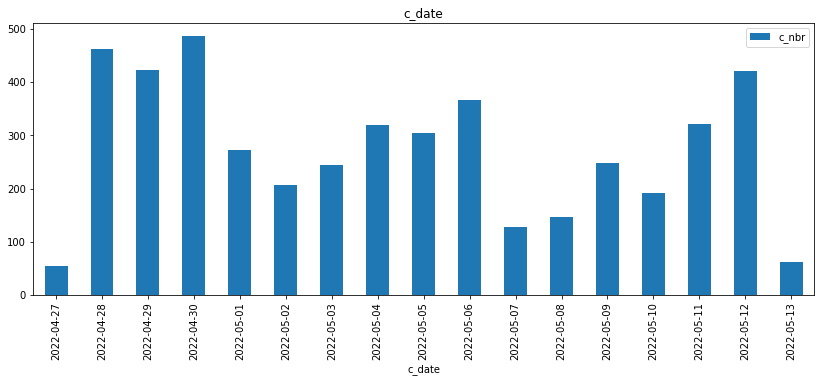

In [206]:
data = pd.read_sql('''
SELECT *
FROM mlanciau_gold.t_twitter_postgresql_nbr_per_day
WHERE c_date > CURRENT_TIMESTAMP - 30 * Interval '1 day'
ORDER BY c_date
''', conn)
data
data.plot(x='c_date', kind='bar', title='c_date')

<AxesSubplot:xlabel='c_author_id'>

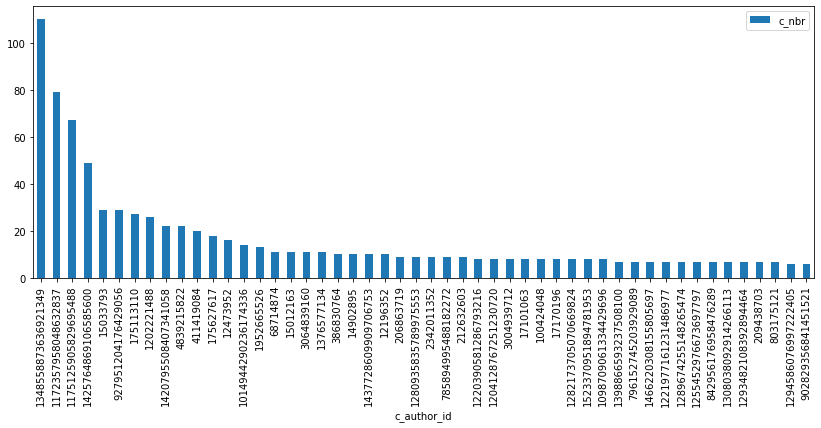

In [207]:
data = pd.read_sql('''
SELECT c_nbr, c_author_id
FROM mlanciau_gold.t_twitter_postgresql_nbr_tweet_per_author
WHERE c_author_id IS NOT NULL
ORDER BY c_nbr DESC
LIMIT 50
''', conn)
data.plot(x='c_author_id', kind='bar')

In [208]:
conn.close()